In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
dataset = pd.read_csv('/content/WineQT.csv')

print(dataset.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

In [ ]:
# Define features (X) and target (y)

X = dataset.drop("quality", axis=1)
y = dataset["quality"]

y = y.apply(lambda q: 0 if q <= 5 else (2 if q >= 7 else 1))

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


In [ ]:
# Initialize the scaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
warnings.simplefilter(action='ignore', category=UserWarning)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)
best_model = rf_model


y_pred = best_model.predict(X_test_scaled)


print("Sample Predictions:", y_pred[:10]) # Print some predictions


from sklearn.metrics import accuracy_score, classification_report


Sample Predictions: [0 0 0 0 0 0 0 0 0 0]


In [ ]:
# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Final Test Accuracy: {test_accuracy:.3f}")

# classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Final Test Accuracy: 0.442
Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.91      0.61        79
           1       0.25      0.06      0.09        69
           2       0.00      0.00      0.00        24

    accuracy                           0.44       172
   macro avg       0.24      0.32      0.24       172
weighted avg       0.31      0.44      0.32       172



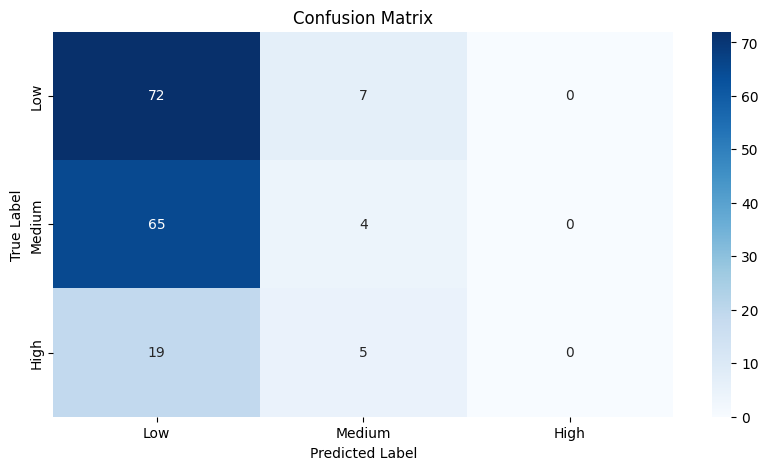

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(10,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues",xticklabels=["Low", "Medium", "High"],yticklabels=["Low", "Medium", "High"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
